In [196]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn3
import mca
import matplotlib.pyplot as plt
from collections import Counter

In [367]:
class Compare:
    def __init__ (self, collections, names=None, index=[], var=[]):
        self.collection_names = names
        self.index = index
        self.collections = collections
        # if a dictionary is inputed, then get names from dictionary
        if isinstance(self.collections, dict):
            self.collection_names = [x for x in self.collections.keys()]
            self.collections = [x for x in self.collections.values()]
        # if index var is provided, use index to filter collection list
        if self.index:
            self.collections = self.sublist(self.collections, self.index)
            self.collection_names = self.sublist(self.collection_names, self.index)
        #two sample venn
        if len(self.collections) == 2:
            self.response = self.two_venn(self.collections)
        #three sample venn
        elif len(self.collections) == 3:
            self.response = self.three_venn(self.collections)
        #use mca for greater than three
        elif len(self.collections) >3:
            if var:
                self.var = var
            else: 
                self.var = []
            self.ca = self.ca(self.collections, self.collection_names)
        else:
            self.no_compare()
            
    def no_compare(self):
        return ("Need at least two collections to compare results.")
    #get a sublist from a list of indices
    def sublist (self, list1, list2):
        return([list1[x] for x in list2])        
    #get set of all items (unduplicated)
    def unionize (self, sets_list):
        return set().union(*sets_list)
    def two_venn (self, collections):
        return  (venn2([set(x) for x in collections], set_labels=self.collection_names))
    def three_venn (self, collections):
        return  (venn3([set(x) for x in collections], set_labels=self.collection_names))
    def ca(self, collections, names):
        # use dd to create dataframe

        dd = self.unionize(collections)
        d = []
        fs, cos, cont = 'Factor Score','Squared cosines', 'Contributions x 1000'
        #populate table with matches for actors (weblists)
        for y in collections:
            d.append({x: x in y for x in dd})
        df = pd.DataFrame(d, index=names)
        if self.var:
            df['Suffix'] = pd.Series(self.var, index=df.index)
        counts = mca.mca(df)
        data = pd.DataFrame(columns=df.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
        data.loc[fs,    :] = counts.fs_r(N=2).T
        points = data.loc[fs].values
        labels = data.columns.values

        plt.figure(figsize=(10,10))
        plt.margins(0.1)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.xlabel('Factor 1')
        plt.ylabel('Factor 2')
        plt.scatter(*points, s=120, marker='o', c='r', alpha=.5, linewidths=0)
        for label, x, y in zip(labels, *points):
            plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
        plt.show()
        return(df.T)
        

In [385]:
collection = dict()
var = dict()
path = "assembled/"
for filename in os.listdir(path):
    file = open(path+filename, "r")
    collect = {line.translate(str.maketrans(')'," ")).split(",")[1].strip() for line in file.readlines()}
    collect2 = [x.split(".")[-2]  for x in collect]
    vars_c = [x.split(".")[-1] for x in collect]
    collection[filename[0:10]] = (collect2) 
    var[filename[0:10]] = (vars_c)
    print (filename)


alberta_education_curriculum-all.txt
alberta_floods_2013-all.txt
alberta_oil_sands-all.txt
canadian_business_grey_literature-all.txt
elxn42-all.txt
energy_environment-all.txt
hcf_alberta_online_encyclopedia-all.txt
health_sciences_grey_literature-all.txt
heritage_community_foundation-all.txt
humanities_computing-all.txt
idle_no_more-all.txt
lfrancophonie_de_louest_canadien-all.txt
ottawa_shooting_october_2014-all.txt
prarie_provinces-all.txt
web_archive_general-all.txt


In [369]:
collection1 = ["google", "apple", "microsoft", "msn", "napster", "oracle", "amazon", "ibm"]
collection2 = ["google", "pear", "thebeatles", "thepogues", "napster", "apple", "cow"]
collection3 = ["google", "apple", "msn", "skunk", "beaver", "wolf", "cow"]
collection4 = ["apple", "jump", "walk", "run", "saunter", "skunk", "napster"]
collection5 = ["pear", "wolf", "jive", "tango"]
collection6 = ["google", "apple", "msn", "thepogues", "napster", "wolf", "amazon", "tango"]

one_collect = [collection1]
two_collect = [collection1, collection2]
three_collect = [collection1, collection2, collection3]
all_collect = [collection1, collection2, collection3, collection4, collection5, collection6]

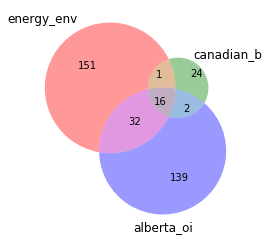

In [381]:
#Venn diagram for two collections
#A has 8 items; B has 7. They have 3 in common.
comparit = [x for x in collection.values()]
var1 = [y for y in var.values()]
names = [x for x in collection.keys()]
compare1 = Compare(comparit, names, [0,1,8])


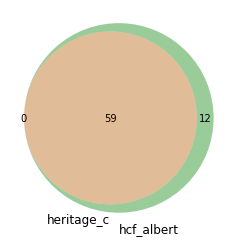

In [387]:
# What happens with three collections
compare2 = Compare(comparit, names, [2,3])


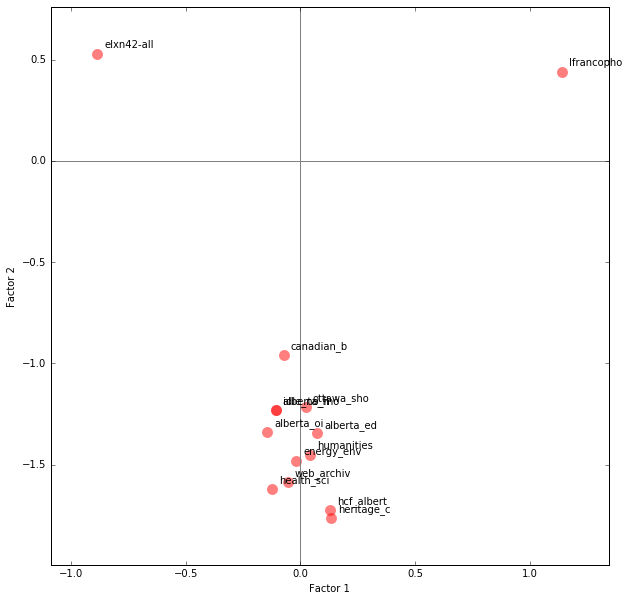

In [384]:
# With more than three collections, the output switches to correspondence analysis.
# Katherine Faust offers a great overview of the method here:
# www.socsci.uci.edu/~kfaust/faust/research/articles/articles.htm
# In this case, collection 2, 3 & 6 have more in common with each other than with the other collections, so
# would be the best possible consideration for a common social network analysis.
# Collection 1 may be another consideration.

del(collection['prarie_pro'])
compare3 = Compare(collection, names)

In [386]:
# Just to show the table of who matches with whom.
print (compare3.ca[0:3])

             energy_env canadian_b heritage_c hcf_albert alberta_fl  \
0464              False      False      False      False      False   
1001portails      False      False      False      False      False   
100huntley        False      False      False      False      False   

             web_archiv health_sci lfrancopho ottawa_sho humanities  \
0464              False      False      False      False      False   
1001portails      False      False      False      False      False   
100huntley        False      False      False      False      False   

             alberta_oi alberta_ed idle_no_mo elxn42-all  
0464              False      False      False       True  
1001portails      False      False      False       True  
100huntley        False      False      False       True  


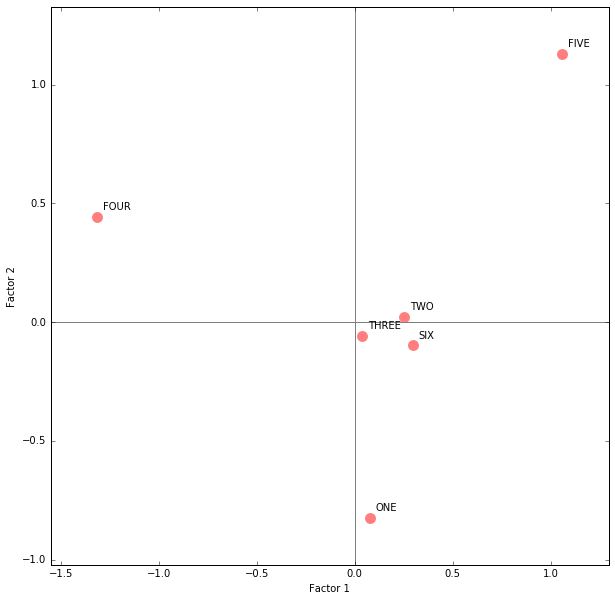

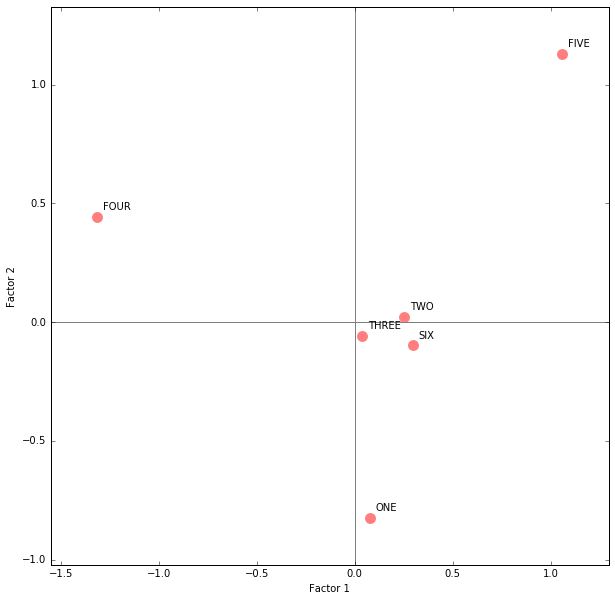

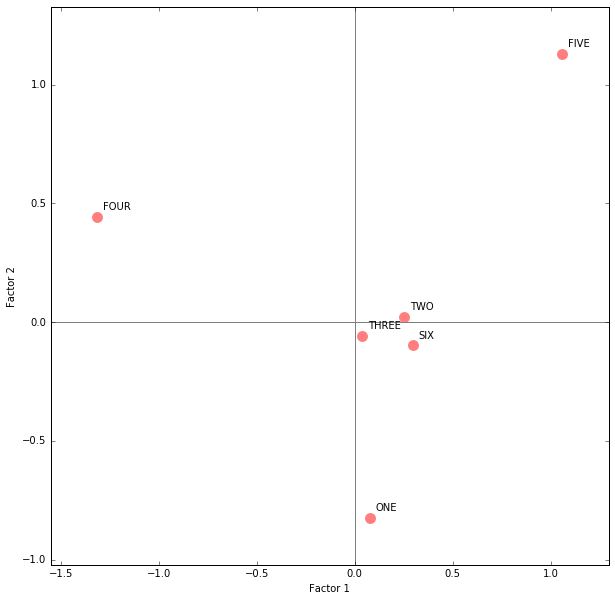

....
----------------------------------------------------------------------
Ran 4 tests in 1.764s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

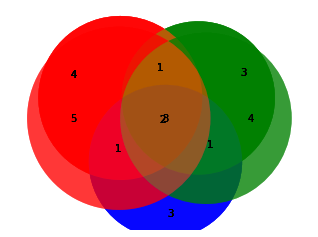

In [388]:
import unittest

class CompareTests(unittest.TestCase):
    
    collection1 = ["google", "apple", "microsoft", "msn", "napster", "oracle", "amazon", "ibm"]
    collection2 = ["google", "pear", "thebeatles", "thepogues", "napster", "apple", "cow"]
    collection3 = ["google", "apple", "msn", "skunk", "beaver", "wolf", "cow"]
    collection4 = ["apple", "jump", "walk", "run", "saunter", "skunk", "napster"]
    collection5 = ["pear", "wolf", "jive", "tango"]
    collection6 = ["google", "apple", "msn", "thepogues", "napster", "wolf", "amazon", "tango"]
    one_collect = [collection1]
    two_collect = [collection1, collection2]
    three_collect = [collection1, collection2, collection3]
    all_collect = [collection1, collection2, collection3, collection4, collection5, collection6]
    
    def test_one (self):
        self.assertTrue(Compare(self.one_collect), "Need at least two collections to compare results.")
        
    def test_two (self):
        self.assertTrue(Compare(self.two_collect).response.subset_labels[1].get_text(), 4)
        self.assertTrue(Compare(self.two_collect).response.subset_labels[0].get_text(), 5)
        self.assertTrue(Compare(self.two_collect).response.subset_labels[2].get_text(), 3)
    
    def test_three (self):
        self.assertTrue(Compare(self.three_collect).response.subset_labels[0].get_text(), 4)
        self.assertTrue(Compare(self.three_collect).response.subset_labels[1].get_text(), 3)
        self.assertTrue(Compare(self.three_collect).response.subset_labels[0].get_text(), 1)
        self.assertTrue(Compare(self.three_collect).response.subset_labels[0].get_text(), 3)
        self.assertTrue(Compare(self.three_collect).response.subset_labels[0].get_text(), 1)
        self.assertTrue(Compare(self.three_collect).response.subset_labels[0].get_text(), 1)
        self.assertTrue(Compare(self.three_collect).response.subset_labels[0].get_text(), 2)
    
    def test_all (self):
        self.assertTrue(list(Compare(all_collect, names=["ONE", "TWO", "THREE", "FOUR", "FIVE", "SIX"]).ca.iloc[1].values), 
                        [True, True, True, True, False, True])
        self.assertTrue(list(Compare(all_collect, names=["ONE", "TWO", "THREE", "FOUR", "FIVE", "SIX"]).ca.ix['amazon'].values),
                        [True, False, False, False, False, True])
        self.assertTrue(list(Compare(all_collect, names=["ONE", "TWO", "THREE", "FOUR", "FIVE", "SIX"]).ca.iloc[5].values),
                        [True, False, False, False, False, False])
        
        
        

suite = unittest.TestLoader().loadTestsFromTestCase(CompareTests)
unittest.TextTestRunner().run(suite)
        

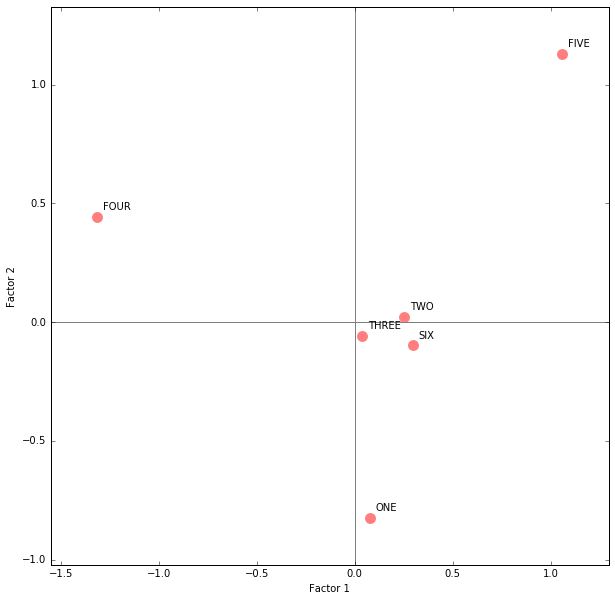

[True, False, False, False, False, False]


In [192]:
#print(dir(Compare(all_collect, names=["ONE", "TWO", "THREE", "FOUR", "FIVE", "SIX"]).ca.iloc[1]))
print(list(Compare(all_collect, names=["ONE", "TWO", "THREE", "FOUR", "FIVE", "SIX"]).ca.iloc[5].values))